In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import fastdup
import os

## Cleaning our scraped data

Our data might have some duplicate images. There are also many images that are not valid that we are going to remove. \
Which are the invalid images? \
For example some images are a drawings of a plant we are looking for, not the actual plant. \
There are also some random objects that share the same name as the plant we are looking for. 

In [2]:
INPUT_DIR = Path('../data/bing_safe/')

In [3]:
labels = []
filenames = []

class_dirs = INPUT_DIR.glob("*")
for class_dir in class_dirs:
    if class_dir.is_dir():
        images = class_dir.glob("*")
        for image in images:
            filenames.append(str(image))
            labels.append(class_dir.name)

df = pd.DataFrame({"filename": filenames, "label": labels})

In [4]:
# Get dimensions of the dataframe
df.shape

(2833, 2)

In [5]:
df.head()

,filename,label
0,../data/bing_safe/Orchid/Orchidaceae_168.jpg,Orchid
1,../data/bing_safe/Orchid/Orchidaceae_1.jpg,Orchid
2,../data/bing_safe/Orchid/Orchidaceae_8.jpg,Orchid
3,../data/bing_safe/Orchid/Orchidaceae_97.jpg,Orchid
4,../data/bing_safe/Orchid/Orchidaceae_115.JPG,Orchid


In [7]:
fd = fastdup.create(input_dir=INPUT_DIR, work_dir="../data/safe_dir")
fd.run(annotations=df)

Fastdup was already applied, use overwrite=True to re-run



fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "../data/bing_safe"
Work directory is set to "../data/safe_dir"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



In [9]:
fd.explore()


The Visual Layer application was launched on your machine, you can find it on http://localhost:9990/dataset/b731905d-2a19-4b70-8d21-8cef0213c2e3/data?page=1 in your web browser.
Use Ctrl + C to stop the application server.

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Thank you for using Visual Layer, the application server on your machine is now closed.
Bye!


In [8]:
# See if there are any broken images
fd.invalid_instances()

,filename,label,index,error_code,filesize,is_valid,fd_index
80,../data/bing_safe/Orchid/Orchidaceae_81.gif,Orchid,80,ERROR_CORRUPT_IMAGE,445415.0,False,80
760,../data/bing_safe/Boston Fern/Nephrolepis_202.gif,Boston Fern,760,ERROR_CORRUPT_IMAGE,19081.0,False,760
903,../data/bing_safe/Spider Plant/Chlorophytum_5.gif,Spider Plant,903,ERROR_CORRUPT_IMAGE,774591.0,False,903
2599,../data/bing_safe/African Violet/African Violet_89.gif,African Violet,2599,ERROR_CORRUPT_IMAGE,2370.0,False,2599


In [9]:
broken_images = fd.invalid_instances()
list_of_broken_images = broken_images['filename'].to_list()
list_of_broken_images

['../data/bing_safe/Orchid/Orchidaceae_81.gif',
 '../data/bing_safe/Boston Fern/Nephrolepis_202.gif',
 '../data/bing_safe/Spider Plant/Chlorophytum_5.gif',
 '../data/bing_safe/African Violet/African Violet_89.gif']

In [10]:
for image in list_of_broken_images:
    if os.path.exists(image):
        os.remove(image)
    else:
        print(f"The file {image} does not exist")

Orchid


Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Finished OK. Components are stored as image files ../data/safe_dir/galleries/components_[index].jpg
Stored components visual view in  ../data/safe_dir/galleries/components.html
Execution time in seconds 1.3
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



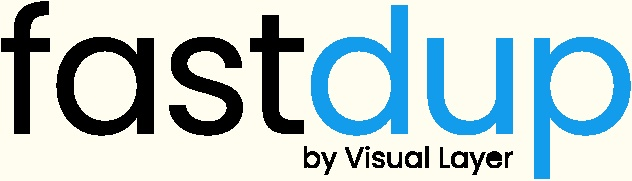
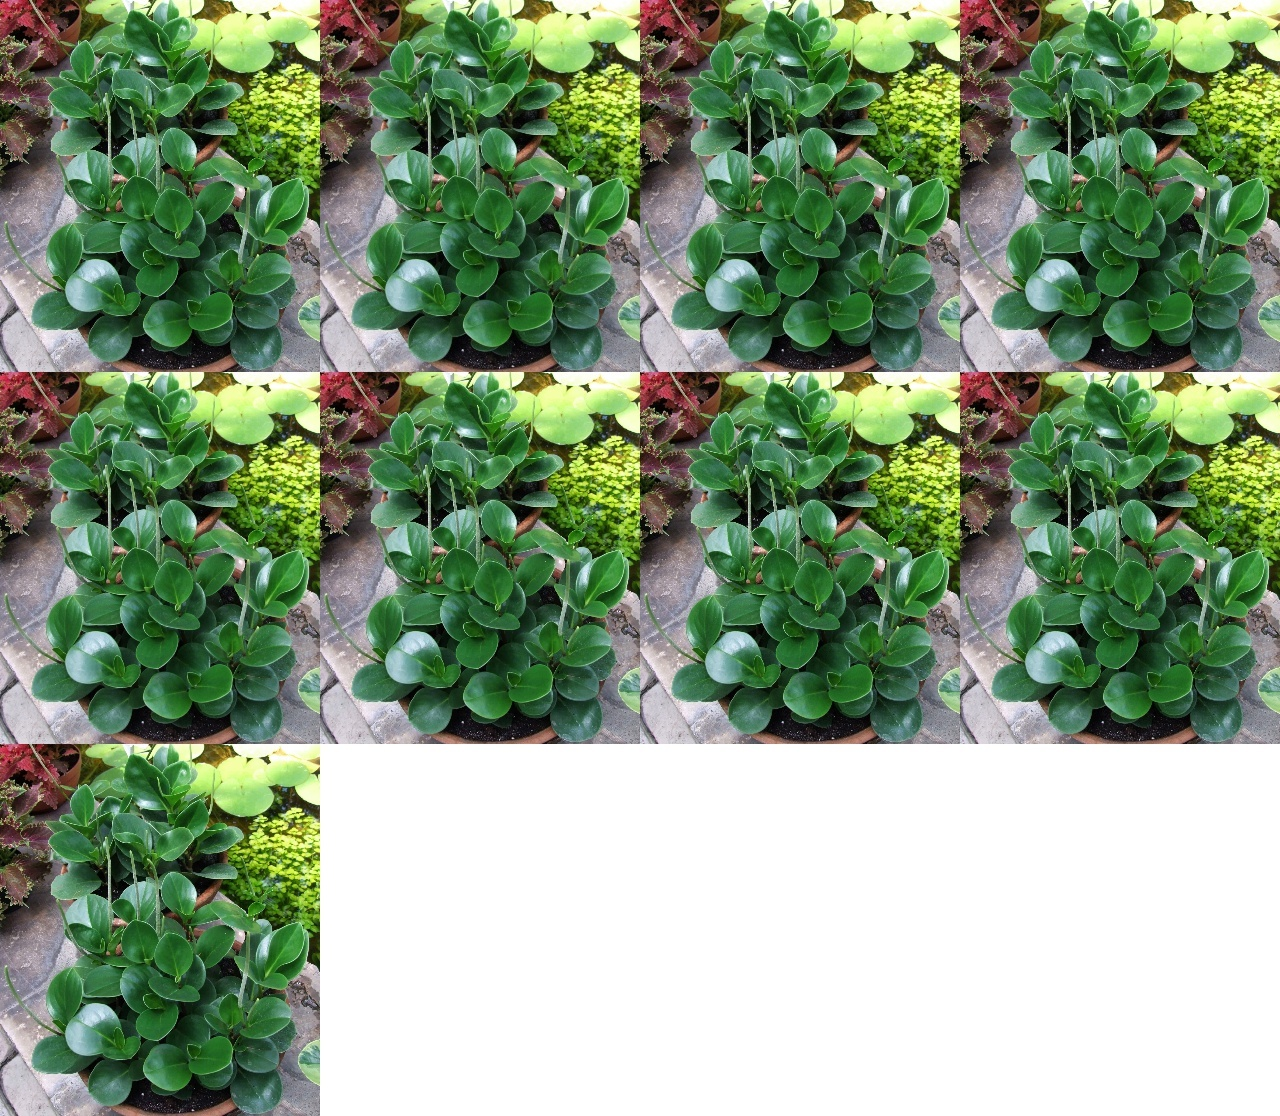
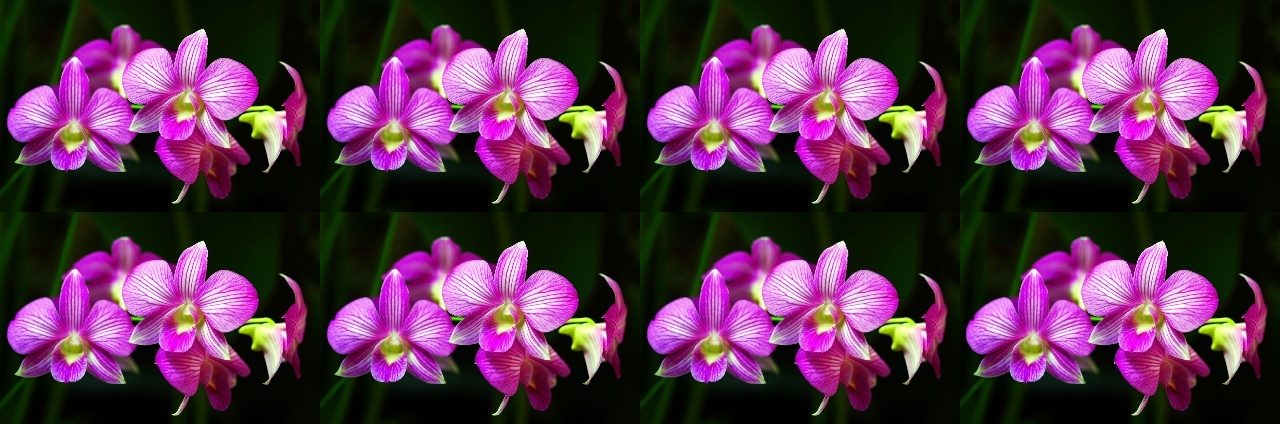
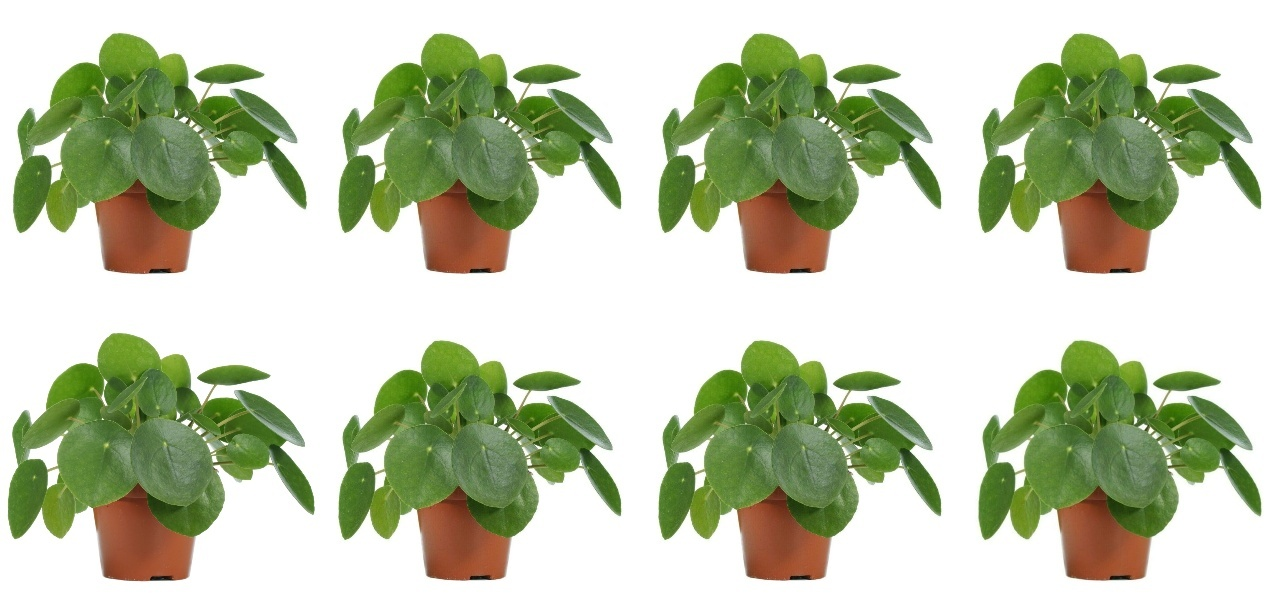
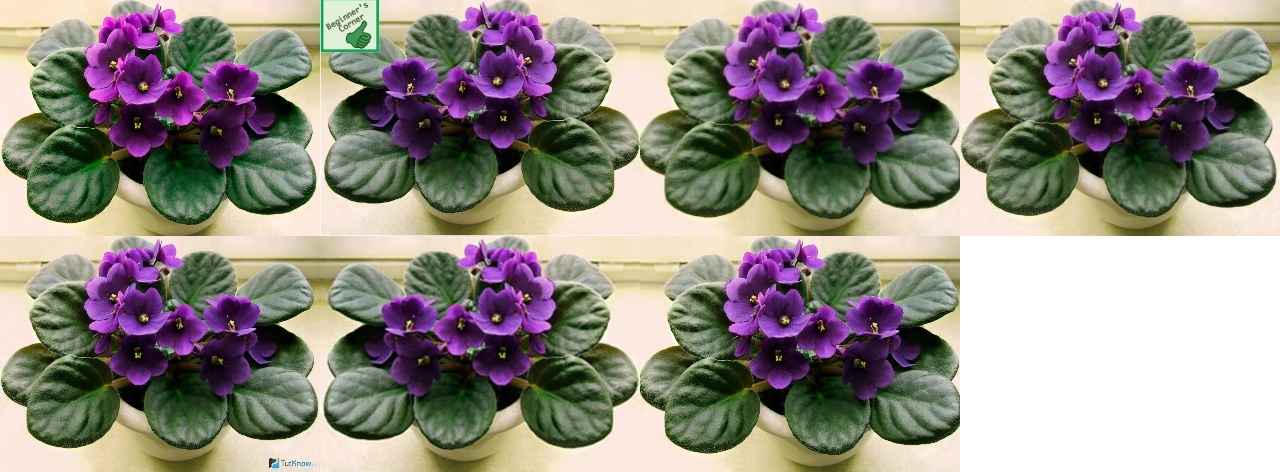
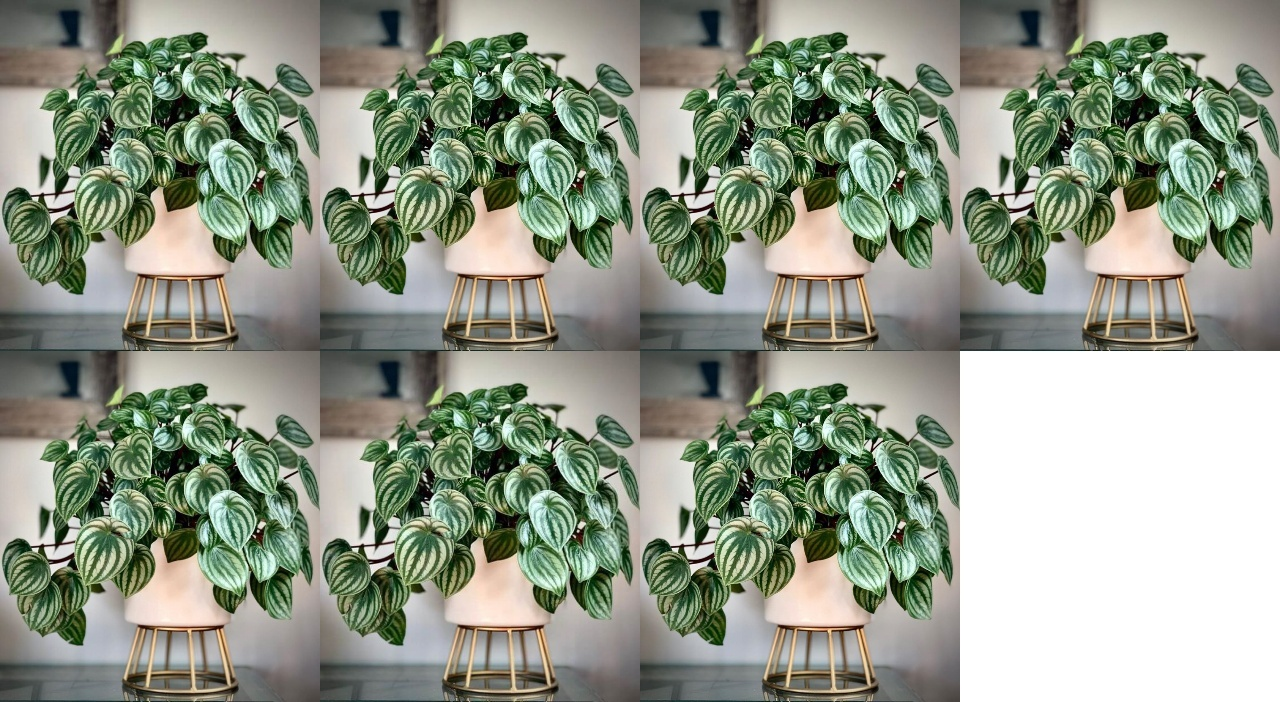

0

In [11]:
fd.vis.component_gallery(num_images=5)


In [12]:
connected_components_df, _ = fd.connected_components()
connected_components_df.head()

,index,component_id,count,mean_distance,min_distance,max_distance,filename,label,error_code,filesize,is_valid,fd_index
0,1,1,4,1.000000,1.00000,1.0,../data/bing_safe/Orchid/Orchidaceae_1.jpg,Orchid,VALID,NaN,True,1
1,6,6,4,1.000000,1.00000,1.0,../data/bing_safe/Orchid/Orchidaceae_53.jpg,Orchid,VALID,NaN,True,6
2,16,16,32,0.998659,0.99602,1.0,../data/bing_safe/Orchid/Orchidaceae_107.jpg,Orchid,VALID,NaN,True,16
3,21,16,32,0.998659,0.99602,1.0,../data/bing_safe/Orchid/Orchid_91.jpg,Orchid,VALID,NaN,True,21
4,29,28,4,1.000000,1.00000,1.0,../data/bing_safe/Orchid/Orchid_48.JPG,Orchid,VALID,NaN,True,29


In [13]:
# a function to group connected components
def get_clusters(df, sort_by='count', min_count=2, ascending=False):
    # columns to aggregate
    agg_dict = {'filename': list, 'mean_distance': max, 'count': len}

    if 'label' in df.columns:
        agg_dict['label'] = list
    
    # filter by count
    df = df[df['count'] >= min_count]
    
    # group and aggregate columns
    grouped_df = df.groupby('component_id').agg(agg_dict)
    
    # sort
    grouped_df = grouped_df.sort_values(by=[sort_by], ascending=ascending)
    return grouped_df


In [14]:
clusters_df = get_clusters(connected_components_df)
clusters_df.head()

,filename,mean_distance,count,label
component_id,,,,
1324,"[../data/bing_safe/Peperomia/Peperomia_116.jpg, ../data/bing_safe/Peperomia/Peperomia_61.jpg, ../data/bing_safe/Peperomia/Peperomia spp._33.jpg, ../data/bing_safe/Peperomia/Peperomia spp._13.jpg, ../data/bing_safe/Peperomia/Peperomia_2.jpeg, ../data/bing_safe/Peperomia/Peperomia_76.jpg, ../data/bing_safe/Peperomia/Peperomia spp._167.jpg, ../data/bing_safe/Peperomia/Peperomia_85.jpg, ../data/bing_safe/Peperomia/Peperomia spp._85.jpg]",0.998360,9,"[Peperomia, Peperomia, Peperomia, Peperomia, Peperomia, Peperomia, Peperomia, Peperomia, Peperomia]"
16,"[../data/bing_safe/Orchid/Orchidaceae_107.jpg, ../data/bing_safe/Orchid/Orchid_91.jpg, ../data/bing_safe/Orchid/Orchidaceae_14.jpg, ../data/bing_safe/Orchid/Orchidaceae_96.jpg, ../data/bing_safe/Orchid/Orchid_19.jpg, ../data/bing_safe/Orchid/Orchid_102.jpg, ../data/bing_safe/Orchid/Orchid_130.jpg, ../data/bing_safe/Orchid/Orchid_100.jpg]",0.998659,8,"[Orchid, Orchid, Orchid, Orchid, Orchid, Orchid, Orchid, Orchid]"
1037,"[../data/bing_safe/Chinese Money Plant/Chinese Money Plant_136.jpeg, ../data/bing_safe/Chinese Money Plant/Pilea peperomioides_174.jpeg, ../data/bing_safe/Chinese Money Plant/Chinese Money Plant_134.jpeg, ../data/bing_safe/Chinese Money Plant/Chinese Money Plant_105.jpeg, ../data/bing_safe/Chinese Money Plant/Chinese Money Plant_5.jpg, ../data/bing_safe/Chinese Money Plant/Chinese Money Plant_135.jpeg, ../data/bing_safe/Chinese Money Plant/Chinese Money Plant_137.jpeg, ../data/bing_safe/Chinese Money Plant/Pilea peperomioides_130.jpeg]",0.995257,8,"[Chinese Money Plant, Chinese Money Plant, Chinese Money Plant, Chinese Money Plant, Chinese Money Plant, Chinese Money Plant, Chinese Money Plant, Chinese Money Plant]"
2051,"[../data/bing_safe/African Violet/Saintpaulia_5.jpg, ../data/bing_safe/African Violet/African Violet_51.jpg, ../data/bing_safe/African Violet/Saintpaulia_174.jpg, ../data/bing_safe/African Violet/Saintpaulia_76.jpg, ../data/bing_safe/African Violet/Saintpaulia_50.jpeg, ../data/bing_safe/African Violet/African Violet_91.jpg, ../data/bing_safe/African Violet/Saintpaulia_102.jpg]",0.977982,7,"[African Violet, African Violet, African Violet, African Violet, African Violet, African Violet, African Violet]"
1275,"[../data/bing_safe/Peperomia/Peperomia spp._111.jpg, ../data/bing_safe/Peperomia/Peperomia_84.jpg, ../data/bing_safe/Peperomia/Peperomia spp._49.jpg, ../data/bing_safe/Peperomia/Peperomia spp._21.jpg, ../data/bing_safe/Peperomia/Peperomia_63.jpg, ../data/bing_safe/Peperomia/Peperomia_133.jpg, ../data/bing_safe/Peperomia/Peperomia_23.jpg]",0.997551,7,"[Peperomia, Peperomia, Peperomia, Peperomia, Peperomia, Peperomia, Peperomia]"


In [15]:
# First sample from each cluster that is kept
cluster_images_to_keep = []
list_of_duplicates = []

for cluster_file_list in clusters_df.filename:
    # keep first file, discard rest
    keep = cluster_file_list[0]
    discard = cluster_file_list[1:]
    
    cluster_images_to_keep.append(keep)
    list_of_duplicates.extend(discard)

print(f"Found {len(set(list_of_duplicates))} highly similar images to discard")


Found 543 highly similar images to discard


In [16]:
len(cluster_images_to_keep)

373

In [17]:
list_of_duplicates

['../data/bing_safe/Peperomia/Peperomia_61.jpg',
 '../data/bing_safe/Peperomia/Peperomia spp._33.jpg',
 '../data/bing_safe/Peperomia/Peperomia spp._13.jpg',
 '../data/bing_safe/Peperomia/Peperomia_2.jpeg',
 '../data/bing_safe/Peperomia/Peperomia_76.jpg',
 '../data/bing_safe/Peperomia/Peperomia spp._167.jpg',
 '../data/bing_safe/Peperomia/Peperomia_85.jpg',
 '../data/bing_safe/Peperomia/Peperomia spp._85.jpg',
 '../data/bing_safe/Orchid/Orchid_91.jpg',
 '../data/bing_safe/Orchid/Orchidaceae_14.jpg',
 '../data/bing_safe/Orchid/Orchidaceae_96.jpg',
 '../data/bing_safe/Orchid/Orchid_19.jpg',
 '../data/bing_safe/Orchid/Orchid_102.jpg',
 '../data/bing_safe/Orchid/Orchid_130.jpg',
 '../data/bing_safe/Orchid/Orchid_100.jpg',
 '../data/bing_safe/Chinese Money Plant/Pilea peperomioides_174.jpeg',
 '../data/bing_safe/Chinese Money Plant/Chinese Money Plant_134.jpeg',
 '../data/bing_safe/Chinese Money Plant/Chinese Money Plant_105.jpeg',
 '../data/bing_safe/Chinese Money Plant/Chinese Money Plant_

In [18]:
# Remove duplicates
for image in list_of_duplicates:
    if os.path.exists(image):
        os.remove(image)
    else:
        print(f"The file {image} does not exist")

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Failed to read image from img_path ../data/bing_safe/African Violet/African Violet_96.jpg
Stored outliers visual view in  ../data/safe_dir/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################


Traceback (most recent call last):
  File "/home/kaka/anaconda3/envs/plants-toxic-for-cats/lib/python3.11/site-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
           ^^^^^^^^^^^^^^^
AssertionError: Failed to read image from ../data/bing_safe/African Violet/African Violet_96.jpg ../data/bing_safe



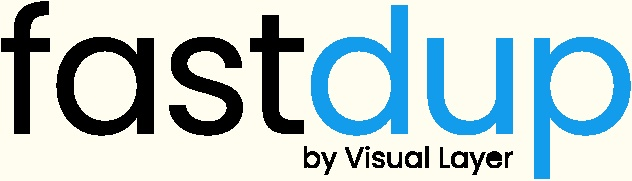
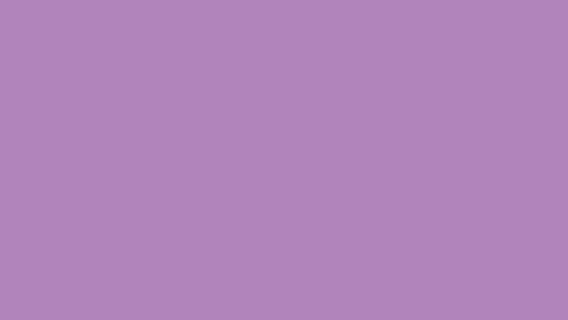
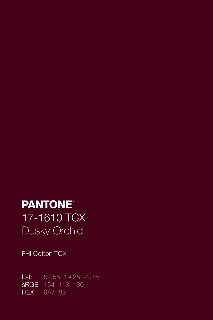
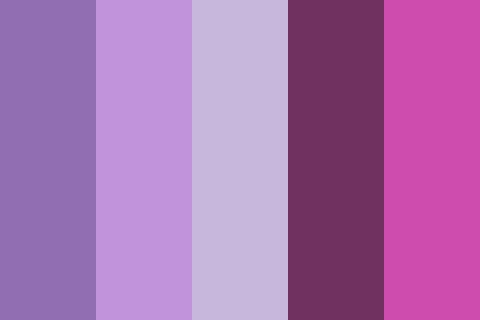
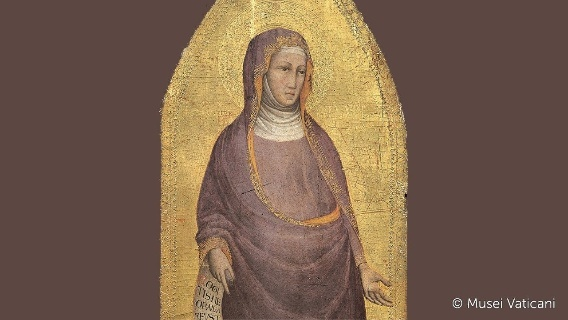

0

In [19]:
fd.vis.outliers_gallery(num_images=5)

In [20]:
outlier_df = fd.outliers()
outlier_df.head(10)

,outlier,nearest,distance,filename_outlier,label_outlier,index_x,error_code_outlier,filesize_outlier,is_valid_outlier,fd_index_outlier,filename_nearest,label_nearest,index_y,error_code_nearest,filesize_nearest,is_valid_nearest,fd_index_nearest
0,2808,2830,0.465069,../data/bing_safe/African Violet/African Violet_96.jpg,African Violet,2808,VALID,NaN,True,2808,../data/bing_safe/African Violet/African Violet_87.png,African Violet,2830,VALID,NaN,True,2830
1,2830,2808,0.465069,../data/bing_safe/African Violet/African Violet_87.png,African Violet,2830,VALID,NaN,True,2830,../data/bing_safe/African Violet/African Violet_96.jpg,African Violet,2808,VALID,NaN,True,2808
2,2787,2830,0.465069,../data/bing_safe/African Violet/African Violet_86.jpg,African Violet,2787,VALID,NaN,True,2787,../data/bing_safe/African Violet/African Violet_87.png,African Violet,2830,VALID,NaN,True,2830
3,107,110,0.484633,../data/bing_safe/Orchid/Orchid_107.png,Orchid,107,VALID,NaN,True,107,../data/bing_safe/Orchid/Orchidaceae_130.jpg,Orchid,110,VALID,NaN,True,110
4,2682,129,0.527665,../data/bing_safe/African Violet/Saintpaulia_168.jpeg,African Violet,2682,VALID,NaN,True,2682,../data/bing_safe/Orchid/Orchidaceae_77.jpg,Orchid,129,VALID,NaN,True,129
5,162,1715,0.569501,../data/bing_safe/Orchid/Orchid_126.png,Orchid,162,VALID,NaN,True,162,../data/bing_safe/Peperomia/Peperomia spp._126.png,Peperomia,1715,VALID,NaN,True,1715
6,408,4,0.579762,../data/bing_safe/Boston Fern/Nephrolepis_80.jpg,Boston Fern,408,VALID,NaN,True,408,../data/bing_safe/Orchid/Orchidaceae_115.JPG,Orchid,4,VALID,NaN,True,4
7,2278,904,0.582728,../data/bing_safe/Calathea sanderiana/pin stripe plant_56.jpg,Calathea sanderiana,2278,VALID,NaN,True,2278,../data/bing_safe/Spider Plant/Spider Plant_9.jpg,Spider Plant,904,VALID,NaN,True,904
8,797,1050,0.582966,../data/bing_safe/Spider Plant/Chlorophytum_174.jpg,Spider Plant,797,VALID,NaN,True,797,../data/bing_safe/Spider Plant/Chlorophytum_209.jpg,Spider Plant,1050,VALID,NaN,True,1050
9,731,2748,0.583398,../data/bing_safe/Boston Fern/Boston Fern_161.png,Boston Fern,731,VALID,NaN,True,731,../data/bing_safe/African Violet/African Violet_101.jpg,African Violet,2748,VALID,NaN,True,2748


In [21]:
list_of_outliers = outlier_df['filename_outlier'].to_list()
len(list_of_outliers)

178

In [22]:
for image in list_of_outliers:
    if os.path.exists(image):
        os.remove(image)
    else:
        print(f"The file {image} does not exist")

The file ../data/bing_safe/African Violet/African Violet_96.jpg does not exist
The file ../data/bing_safe/Boston Fern/Boston Fern_161.png does not exist
The file ../data/bing_safe/Boston Fern/Boston Fern_180.jpeg does not exist
The file ../data/bing_safe/Peperomia/Peperomia spp._117.jpg does not exist
The file ../data/bing_safe/Boston Fern/Nephrolepis_23.jpg does not exist
The file ../data/bing_safe/Boston Fern/Nephrolepis_96.jpeg does not exist
The file ../data/bing_safe/Zebra plant/Haworthia fasciata_37.jpg does not exist
The file ../data/bing_safe/Chinese Money Plant/Chinese Money Plant_113.jpeg does not exist
The file ../data/bing_safe/Peperomia/Peperomia spp._165.jpg does not exist
